# Plot Wave Watch 3 (WW3) wave height and period vs. wind speed and compare these graphics with the equations used in MOHID. The WW3 values used are from past 7 days prior to present.   

In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import arrow 
import cmocean

%matplotlib inline

## Load Wave Watch 3 data set into xarray.  

In [2]:
xww3 = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSf2DWaveFields30mV17-02')

## Extract values from the first time step

In [3]:
xhs_ww3 = xww3.hs[:,:,1]
xt_ww3 = xww3.t02[:,:,1]
u_ww3 = xww3.uwnd[:,:,1]
v_ww3 = xww3.vwnd[:,:,1]

In [4]:
hs_ww3 = xhs_ww3.values
t_ww3 = xt_ww3.values
u_ww3 = u_ww3.values
v_ww3 = v_ww3.values

In [28]:
v_ww3.shape

(360, 661)

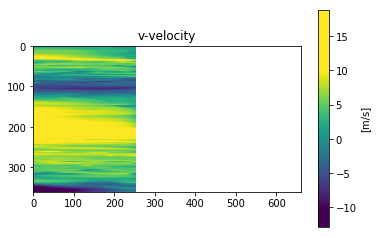

In [27]:
fig, ax = plt.subplots()
cax = ax.imshow(v_ww3)
ax.set_title('v-velocity')
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.set_ylabel('[m/s]')
cbar.set_clim(-10, 10)

In [6]:
wspd_ww3 = np.sqrt(u_ww3**2 + v_ww3**2)

In [7]:
hs_ww3.shape

(360, 661)

In [8]:
hs_ww3_v = hs_ww3.reshape(1,360*661)
t_ww3_v = t_ww3.reshape(1,360*661)

In [9]:
hs_ww3_v

array([[        nan,  0.25238654,  0.25298181, ...,         nan,
                nan,         nan]], dtype=float32)

In [10]:
xw = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [11]:
u = xw.u_wind.sel(time=slice("2018-09-01 16:00:00"))

In [12]:
v = xw.v_wind.sel(time=slice("2018-09-01 16:00:00"))

In [13]:
v.shape

(34817, 266, 256)

In [14]:
v1 = v[1,:,:].values
u1 = u[1,:,:].values
v1.shape

(266, 256)

In [15]:
u1

array([[-6.29785299, -6.29785299, -6.28285265, ..., -0.40785277,
        -0.55285281, -0.72785276],
       [-6.31285286, -6.32285261, -6.30285263, ..., -0.64785278,
        -0.77285278, -1.0028528 ],
       [-6.32785273, -6.33285284, -6.31785297, ..., -0.84285277,
        -0.97785276, -1.28285277],
       ..., 
       [ 0.35214722,  0.27214721,  0.18214722, ...,  0.10714722,
         0.5671472 ,  0.85714722],
       [ 0.48714721,  0.39214721,  0.28214723, ...,  0.23214722,
         0.49214721,  0.76214719],
       [ 0.5671472 ,  0.49214721,  0.38714722, ...,  0.24214722,
         0.29714721,  0.60214722]], dtype=float32)

In [16]:
wspd = np.sqrt(u1**2 + v1**2)
wspd

array([[ 11.00235748,  11.02286625,  11.04306793, ...,   2.17515993,
          2.20210886,   2.34727955],
       [ 10.95775795,  10.98804379,  11.01341915, ...,   2.52123761,
          2.4278748 ,   2.82086372],
       [ 10.91338253,  10.94888878,  10.97698784, ...,   2.85388231,
          2.70920777,   3.34255767],
       ..., 
       [  2.14255667,   2.1755085 ,   2.19598627, ...,   0.76099998,
          0.83542746,   1.062832  ],
       [  1.95992541,   1.96298778,   1.96874189, ...,   0.9085772 ,
          0.91672581,   1.11468339],
       [  1.8048439 ,   1.78750479,   1.78100657, ...,   0.92565286,
          0.82853711,   0.92975211]], dtype=float32)

In [17]:
wspd_v = wspd.reshape([1,266*256])

wspd_ww3_v = wspd_ww3.reshape([1,360*661])

In [18]:
wspd_v

array([[ 11.00235748,  11.02286625,  11.04306793, ...,   0.92565286,
          0.82853711,   0.92975211]], dtype=float32)

In [19]:
Hs = 0.0121*wspd_v**2

In [20]:
Tm = 0.812 * 3.14 * wspd_v / 9.8

## Plot up wave height vs. wind speed 

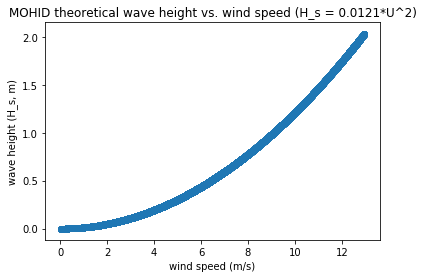

In [21]:
fig, ax = plt.subplots()
ax.scatter(wspd_v, Hs)
ax.set_title('MOHID theoretical wave height vs. wind speed (H_s = 0.0121*U^2)')
ax.set_xlabel('wind speed (m/s)')
ax.set_ylabel('wave height (H_s, m)')
fig.savefig('MOHID_Hs.jpeg',dpi=224,quality=50)

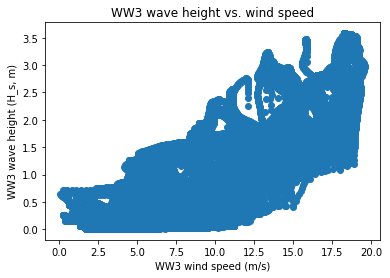

In [22]:
fig, ax = plt.subplots()
ax.scatter(wspd_ww3_v, hs_ww3_v)
ax.set_title('WW3 wave height vs. wind speed')
ax.set_xlabel('WW3 wind speed (m/s)')
ax.set_ylabel('WW3 wave height (H_s, m)')
fig.savefig('WW3_Hs.jpeg',dpi=224,quality=50)

## Plot up wave period vs. wind speed

Text(0,0.5,'wave period (T_m, m)')

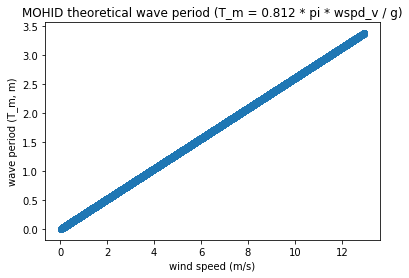

In [23]:
fig, ax = plt.subplots()
ax.scatter(wspd_v, Tm)
ax.set_title('MOHID theoretical wave period (T_m = 0.812 * pi * wspd_v / g)')
ax.set_xlabel('wind speed (m/s)')
ax.set_ylabel('wave period (T_m, m)')

## Now look at results using a limited range of WW3 that eliminates the open ocean values